# Data Protection & Privacy Project

## Paper 10: Maintaining Data Privacy in Association Rule Mining

### Group:

- Mouhamad Alkarsifi (5041181)
- Dorina Cadri (5052477)
- Osman-Aldiyar Rakhmetov (4903253)


The paper presents a scheme called MASK, based on a probabilistic distortion of user data that can simultaneously provide a high degree of privacy to the user and retain a high level of accuracy in the mining results.

Here we present a summary of the main parts of MASK scheme represented in the paper.

### Database Model

It is assumed that: each customer contributes to the database with a tuple with a fixed length sequence of 1’s and 0’s. A typical example of a such database is the so-called “Market-Basket” database in which:
•	the columns represent the items sold by a supermarket;
•	the rows describe through a sequence of 1’ and 0’s the purchases made by a particular custome r( 1 indicates a purchase and 0 indicates no purchase);

###  Privacy : 

Normal Probability Distortion Technqiue is the mechanism used in the paper to distort the user data before it is subject to the mining process for achieveing privacy.The privacy is measured with regard to the probability with which the user’s distorted entries can be reconstructed. The privacy metric is: “with what probability can a given 1 or 0 in the true matrix be reconstructed”?

### Mining Procedure: 

The Mnining  Objective: to efficiently discover all frequent itemsets of the real database using the distorted database and knowing the distortion probability, based on the main idea of the classical Apriori Algorithm.

### Performance Framework to evaluate MASK scheme

Classical Apriori Algorithm is applied to the real dataset to find the frequent itemsets and their actual supports.

The algorithm proposed in the MASK scheme is used to find the frequent itemsets of the real dataset and their reconstructed estimated supports using the distorted dataset and the distortion probability.

finally, the frequent itemsets and their supports obtained by MASK are compared with the real/actual frequent itemsets and their supports defined by Apriori Algorithm in order to measure the performance of MASK scheme(to compute the errors).


In [1]:
# importing the needed libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random
from itertools import combinations
import itertools
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules 
import csv
import string

## Quantifying MASK’s Privacy

In this section, we present the distortion procedure used by the MASK scheme and quantify the privacy provided by the procedure.


### Probability Distortion Procedure

Suposse that a customer tuple is a random vector X = {X_i}, such that X_i = 0 or X_i= 1.  

The identity of the i-th element in X is kept the same with probability p and is flipped with probability (1-p). All the customer tuples are distorted in this way and make up the database supplied to the miner in effect. Hence, the miner receives a probabilistic function of the true customer database. 

T = the TRUE matrix (original dataset)

D = the DISTORTED matrix (the dataset obtained after applying in T the distortion procedure)

dist_P = the distortion probability

distort() --> a function used to distort the data based on dist_P

s_0 = average support of an item in the database

a = the weight given to 1’s over 0’s. 

R1_p = the probability with which a ‘1’ can be reconstructed from the distorted entry computed as:

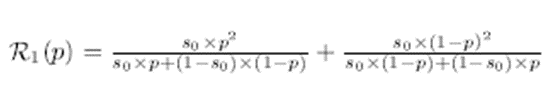

R0_p = the probability with which a ‘0’ can be reconstructed from the distorted entry computed as:

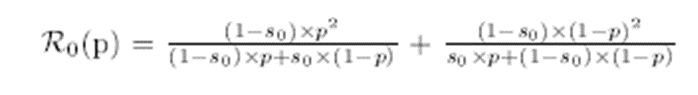

R_p = total reconstruction probability computed as:

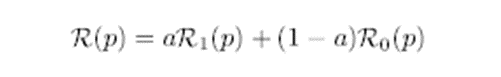

P_p = user Privacy 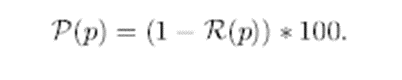

In [2]:
def distort(T, dist_P): 
    
    D = T
    for col in range(D.shape[1]):
        rand_num = random.random() # Returns a random float number between 0 and 1
        if (rand_num > (1-dist_P)):
            D[:, col]=((D[:, col])+1)%2
    
    return D

In [3]:
def privacy_metric(s_0, a, p):
    
    # computing R1_p and R0_p
    R1_p = ((s_0*(p**2))/ ( (s_0*p) + ((1-s_0)*(1-p)))) + ((s_0*((1-p)**2))/ ( (s_0*(1-p)) + ((1-s_0)*p)))
    R0_p = (( (1-s_0)*(p**2))/ ( ((1-s_0)*p) + (s_0*(1-p)))) + ((s_0*( (1-p)**2))/ ((s_0*p) + ((1-s_0)*(1-p))))
    # computing the total reconstruction probability
    R_p = (a*R1_p) + ((1-a)*R0_p)
    # computing the privacy
    P_p = (1-R_p)*100
    
    return P_p


## MASK Algorithm for mining the distorted database

In this section is represented the MASK’S technique used for estimating the true (accurate) supports of itemsets from a distorted database. 
We have to keep in mind that the miner is provided with both the distorted matrix as well as the distortion procedure, that is, he knows the value of p that was used in distorting the true matrix.

#### Estimating Singleton Supports

We denote that the original true matrix by T and the distorted matrix, obtained with a distortion probability p, as D.  Now we consider a random individual item i. Let c_1^T and c_0^T represent the number of 1’s and 0’s, respectively, in the i column of T, while c_1^D and c_0^D represent the number of 1’s and 0’s, respectively, in the i column of D. With this notation, we estimate the support of i in T using the following equation:

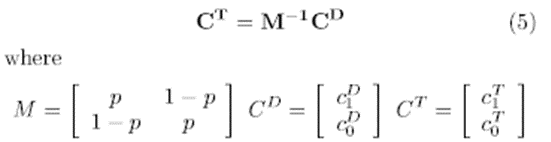

The matrix M in the above equation incorporates the observation that by our method of distortion, if a column had n 1’s in T, these 1’s will generate approximately (pn) 1’s and (1-p)n 0’s for the same column in D. Similarly for the 0’s of this column in T. Therefore, given c_1^D and c_0^D, it is possible to estimate the value of c_1^T, that is, the true support of item i.

#### Estimating n-itemset Supports

To compute the support for an arbitrary n-itemset, the matrices above are extened as:

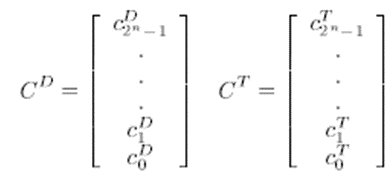

Here c_k^T should be interpreted as the count of the tuples in T that have the binary form of k (in n digits) for the given itemset (that is, for a 2-itemset, c_2^T refers to the count of 10’s in the columns of T corresponding to that itemset, c_3^T to the count of 11’s and so on).
Similarly, c_k^D is defined for the distorted matrix D.
Finally, the matrix M is defined as:

m_(i,j)=the probability that a tuple of the form corresponding to c_j^T  in T goes to 
a tuple of the form corresponding to c_i^D  in D 

For example, m_1,2 for a 2-itemset is the probability that a 10 tuple distorts to a 01 tuple. Accordingly, m_1,2=(1-p)(1-p). The basis for this formulation lies in the fact that in our distortion procedure, the component columns of an n-itemset are distorted independently. Therefore, we can use the product of the probability terms. 

#### The Full Mining Process

The above equations help us to estimate the value of c_(2^n-1)^T for an n-itemset by using the values of c_i^D, where 0<=i<=2n-1. But, first we need to compute the c_i^D values themselves. For this purpose, is used the classical Apriori algorithm. Apriori is a multi-pass algorithm wherein the i-th pass computes the frequent i-itemsets by counting all the candidate itemsets associated with the pass and, after each pass, the AprioriGen algorithm is used for generating the candidate itemsets for the next pass. In the approach of MASK scheme too, the i-th pass identifies large i-itemsets, and the same idea of AprioriGen algorithm is used for generating the candidate itemsets for the next pass.
A critical difference between the MASK approach and that of Apriori is: 
Supose that we are counting 2-itemsets. Here, Apriori only needs to keep track, for each candidate 2-itemsets, of the number of tuples in which there was a ‘1’ for both the items appearing in the itemset. That is, it needs to count only the ‘11’s. But,based on the MASK scheme, we need to keep track of all combinations: 00, 01,10 and 11. This is a direct fallout of the fact that we have distorted the true matrix, and an original ‘11’ can now potentially be any of the four combinations. 

#### MASK Optimizations 

1. Linear number of counters

A simple optimization that we have applied to reduce the total amount of counting. At the end of n-th pass we generate a square matric of size 2^n which depends only on p(distortion probability). We then invert it and apply the resulting matrix with the counts of the 2^n components of every n-itemsets. In effect, the reconstructed support is a weighted sum of the counts of all 2^n components in the distorted database. NOTE: these 2^n weights have only n+1 (linear) number of distinct weights on them.

Suppose we are in the 2-nd pass dealing with 2-itemsets. The estimated reconstructed support for each possible 2-itemset will be:

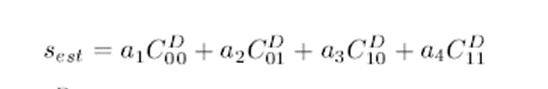

where C_xy^D is the count of tuples "xy" in the distorted matrix and a_1 are the associated weights. We note that a_2 and a_3 will be equal because the probability that a "11" tuple to distort into "01" and the probability that "11" distorts to "10" is equal (p(1-p) (the reverse components weights will also be equal). This is why, in this case it is needed to keep three counters: one for  "00", one for "11" and one for "01"&"10". As a result we will not have 2^n weights but n+1 weights. In the example of 2-itemsets we will have not 4 weights to compute but 3 weights. One weight is for the number of tuples C_0 that contain zero "1" in them, one weight is for the number of tuples C_1 that contain only one "1" in them and one weight is for the number of tuples C_2 that contain two "1"-s in them.

2. Amount of counting 

Another optimization can be reached by counting only tuples for each n-itemsets that contain one ore more "1"-s in them. We do not need to count tuples that contain only "0" in them (it can be defined by the division of the total number of tuples in the dataset by the total number of tuples that have one or more "1" in them).

#### Final Summary: 

The reconstructed estimated support for an n-itemset can be extened as:

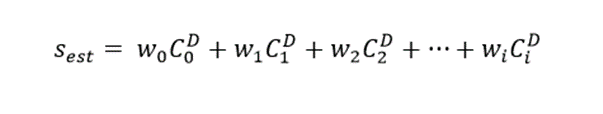

where: 

n = the number of items in the itemset

i = [0,1,...,n] --> the number of "1"-s 

C_i^D = the number of tuples in the distorted matrix D with i "1"-s in them

w_i = the weight that corresponds to C_i^D computed as:

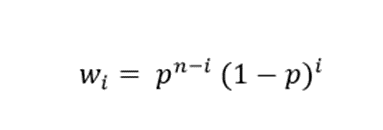

p = distortion probability 

min_s = minimum support

If the estimated support of a certain n-itemset is equal or greater than the minimum support, that n-itemset is considered as frequent.

The equation to compute the true supports needs to be evaluated only at the end of every pass over the distorted matrix, and not on a tuple-by-tuple basis.

We have implemented the function below, where: 

MASK(D, dist_P, min_s) - is a function that find the frequent itemsets of the true dataset and their reconstructed estimated supports, given the distorted dataset and the distortion probability.


#### MASK Algorithm method

In [4]:
def MASK(D, dist_P, min_s, Verbose=False):
    
    f = []   # list needed to keep track of the frequent itemsets of all the passes
    s_f = [] # list needed to keep track of the estimated supports values of those f itemsets
    
    
    # generating the list "items" with letters that identify the items of the dataset: [A, B, C, D, E...] 
    alphabet = string.ascii_uppercase 
    items = list(alphabet)[:D.shape[1]] # number of items  = number of columns
    # generating a dictionary "alpha_items_map" with (key,value) pairs where key is the item and value is
    # the corresponding column of the item in the dataset: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4...}
    alpha_items_map = {} 
    column_index = 0
    for i in items:
        alpha_items_map[i] = column_index
        column_index+=1
    if Verbose: print("The items with their corresponding column number in the dataset: ", alpha_items_map)
    
    passes = D.shape[1] # number of max passes = number of columns
    
    # keeping track of the time when the execution starts
    start = time.time()
    
    # starting the algorithm
    for p in range(passes):
        
        n = p+1 # n-itemsets
        if Verbose: print("\nPASS: ", n, "( ",n, "-itemsets)")
        
        # generating all the possible n-itemset combinations
        n_combinations = combinations(items, n) 
        n_combinations = [''.join(c) for c in n_combinations]
        n_combinations = np.array(n_combinations)
        
        # NOTE: if we are not in the first pass, we have to remove the n-itemset combinations that contain
        # the unique single items/singletons(letters) of the previous pass ( combinations from "non_f_n_itemsets"
        # array,should be removed in the current pass)
        if (n>1): 
            non_f_singletons = [] 
            for comb in non_f_n_itemsets: # c is a combination from "non_f_n_itemsets" of string type(e.g:'AB')
                for c in list(comb): # converting list(c) into array of chars (e.g 'AB'--> [A, B])
                    if c not in non_f_singletons: # keep track only unique letters (single items)
                        non_f_singletons.append(c)
            if Verbose: print('The singletons that should be removed from this pass are: ', non_f_singletons)
            
            new_n_combinations = []
            for comb in n_combinations:
                if not any(c in comb for c in non_f_singletons):
                    new_n_combinations.append(comb)
            n_combinations = np.array(new_n_combinations) 
            
        if Verbose: print("The final possible combinations for this pass are: ", n_combinations)
        
        # generating an array "possible_ones" with all the possible number of "1"-s a combination can have (e.g: 
        # if n=2 --> possible_ones = [1,2] )
        possible_ones = np.array(range(1, n+1)) 
        if Verbose: print("All the possible number of 1-s each combination can have: ", possible_ones)
        
        # generating an array with the weights that correspond to each possible number of "1"-s
        weights = np.zeros(n)
        for p in possible_ones:
            weight = (dist_P**(n-p))*((1-dist_P)**p)
            weights[p-1]=weight
        if Verbose: print("The weights corresponding to each possible number of ones: ", weights)
        
        f_n_itemsets = []     # to keep track of the frequent itemsets of the current pass
        s_f_n_itemsets = []   # to keep track of the estimated support values for frequent itemsets of the pass
        non_f_n_itemsets = [] # to keep track of the non-frequent itemsets of the current pass that should be 
        # part of the combinations of the next pass
        
        # for each combination: computing its estimated support (defining if it is frequent or not)
        for comb in n_combinations:
            
            # for each item in the combination "comb" defining a list "columns" with the corresponding columns 
            # of the items in the dataset using the "alpha_items_map" dictionary ( e.g: if comb = 'AB' ---> 
            # columns = [0,1])
            columns=[]
            for item in comb:
                item_column = alpha_items_map[item]
                columns.append(item_column)
            
            # if Verbose: print("Combination: ",comb)
            # if Verbose: print("The corresponding columns of each item in this combination:are ", columns )
            
            # generating "comb_ones" array that will keep track of the number of tuples that have a number of 
            # "1"-s in them equal to the (position+1) of that number in "comb_ones" array ( e.g: if we get a :
            # result comb_ones = [5,8] it means that for the current combination of items "comb", there are 5 
            # tuples in the dataset with one "1" in them and 8 tuples with two "1"s in them) 
            # so in "comb_ones" array: each "element" is the number of tuples in the dataset, and the "position+1"
            # of each element is the number of "1"s in those tuples
            # NOTE:if for the combination of items is,'AB', a tuple [0,1] in the dataset means that the customer 
            # didn't buy item A and bought item B
            comb_ones = np.zeros(n, dtype=int)
            
            # we slice the dataset matrix based only on the columns included in the current combination
            # and then we continue with the counting of tuples with certain number of "1"- s and fill
            # comb_ones array
            D_slice = D[:, columns]
            D_slice_sum = D_slice.sum(axis=1)
            # if Verbose: print('Combination columns slice sum ', D_slice_sum)
            for i in range(n):
                comb_ones[i] = np.count_nonzero(D_slice_sum == i+1)
            # print('Number of ones ', comb_ones)
            
            # computing the estimated support for each combination
            row_zeros = D.shape[0]-sum(comb_ones)  # number of tuples that contain only "0"-s
            weight_row_zeros = (dist_P)**n    # the weight for tuples that contain only "0"-s
            s_est = (weight_row_zeros*row_zeros)   # support for tuples with only "0"-s
            for p in possible_ones: 
                s_est += (weights[p-1]*comb_ones[p-1])
            # print("The estimated support: ", s_est)
            
            # comparing s_est with min support (min_s) to define the frequent itemsets of the pass
            if (s_est>=min_s):
                f_n_itemsets.append(comb)    
                s_f_n_itemsets.append(s_est) 
                f.append(comb)    
                s_f.append(s_est) 
            else:
                non_f_n_itemsets.append(comb)  
                
        f_n_itemsets = np.array(f_n_itemsets)     
        s_f_n_itemsets = np.array(s_f_n_itemsets) 
        non_f_n_itemsets = np.array(non_f_n_itemsets) 
        if Verbose: print("Frequent itemsets for this pass are: ", f_n_itemsets)
        if Verbose: print("The estimated support values of them are: ", s_f_n_itemsets)
        if Verbose: print("Non frequent itemsets that should not be part of the combinations of the next pass are: ", non_f_n_itemsets )
        
        # if the f_n_itemsets array is empty we shouldn't continue with the next pass
        if (np.size(f_n_itemsets)==0):
            break;        
            
    print("The algorithm stopped because there are no more frequent itemsets! ")
    
    # calculating the execution time
    end = time.time()
    duration = end - start
    duration = str(round(duration, 2))
    if Verbose: print("Processing time is:", duration, "sec.")
    return np.array(f), np.array(s_f)

### Computing the Error Metrics

- Support Error
- Identity Error

In [5]:
def support_and_identity_error(mask_f, mask_f_s, apriori_f, apriori_f_s, Verbose=False):
    
    nbr_m_f = np.size(mask_f) # number of frequent itemsets defined by the mask algorithm
    levels = len(mask_f[nbr_m_f-1])  # the max number of levels (passes) is equal to the
    # number of items of the last frequent itemset from mask result
    
    L = []  # to keep track of the levels for which Mask has identified itemsets correctly
    C_f= [] # to keep track of all the frquent itemsets identified correclty by Mask in all the levels 
    S_e = [] # to keep track of all the support errors computed for each level
    F_p = [] # to keep track of all the false positive identity errors computed for each level
    F_n = [] # to keep track of all the false negative identity errors computed for each level
    
    # computing the error metrices for each level (pass)
    for l in range(levels):
        level = l+1
        if Verbose: print("LEVEL: ", level)
        level_mask_f = []   # to keep track of the level's frequent itemsets defined by mask
        level_mask_f_s = [] # to keep track of the level's frequent itemsets estimated supports computed by mask
        for i in range(np.size(mask_f)):
            if( len(mask_f[i]) == level ):
                level_mask_f.append(mask_f[i])
                level_mask_f_s.append(mask_f_s[i])
        
        support_error = 0 # SUPPORT ERROR metrics to be computed as:
        # support_error = 1/|f| * sum_f(|rec_sup_f-act_sup_f|/act_sup_f)

        false_positive = 0 # false positive Identity Error (the percentage of false positve = |R-F|/|F|)
        false_negative = 0 # false negative Identity Error (the percentage of false negative = |F-R|/|F|)
        Sum = 0
        R = np.size(level_mask_f) # the number of frequent itemsets of the level defined by mask
        F = 0 # the number of the frequent itemsets of the level identified "CORRECTLY" by mask
        Correct_f = [] # to keep track of the frequent itemsets identified correctly by mask
        Rec_S =[]  # to keep track of the reconstructed(estimated) supports of the itemsets in 
        # Correct_f computed by mask
        Act_S = [] # to keep track of the real(actual) supports of the itemsets in Correct_f 
        # given by apriori alg
        for i in range(np.size(apriori_f)):
            for j in range(np.size(level_mask_f)):
                if(level_mask_f[j] == apriori_f[i]):
                    rec_s = level_mask_f_s[j] # reconstructed support(the estimated support by mask alg)
                    act_s = apriori_f_s[i]    # actual support ( the real support defined by apriori alg)
                    Sum += (abs(rec_s-act_s))/act_s
                    F+=1
                    Correct_f.append(level_mask_f[j])
                    Rec_S.append(level_mask_f_s[j])
                    Act_S.append(apriori_f_s[i])
        # only if at the end we realize that F is not 0 (so the number of the frequent itemsets identified 
        # correctly is greater than 0 we will compute the errors)
        if(F!=0):
            support_error =  1/F * Sum 
            false_positive = (abs(R-F))/abs(F)
            false_negative = (abs(F-R))/abs(F)
        L.append(level)
        S_e.append(support_error)
        F_p.append(false_positive)
        F_n.append(false_negative)
        if Verbose: print("The support error: ", support_error)
        if Verbose: print("Percentage of false positive: ", false_positive)
        if Verbose: print("Percentage of false negative: ", false_negative)
        
    return L, S_e, F_p, F_n

### Applying MASK scheme on a small synthetic dataset

#### Step 1: Distortion Procedure and Privacy

In [6]:
# creating True matrix
T = np.array([[1,0,1,1,0,1,0,0,1,1,0],   
              [0,1,0,0,1,1,0,0,0,0,0],    
              [1,0,0,0,1,1,1,0,1,0,1]]) 
dist_P = 0.7 # the distortion probability 
# building the distorted matrix D by distorting D
D = distort(T, dist_P )
s_0 = 0.01
a = 0.75
privacy = privacy_metric(s_0, a, dist_P)
print("True matrix: ", T)
print("Distorted matrix: ", D)
print("Privacy attained: ", privacy, "%")

True matrix:  [[1 1 0 0 0 1 1 1 0 0 1]
 [0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 0 1 0]]
Distorted matrix:  [[1 1 0 0 0 1 1 1 0 0 1]
 [0 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 0 1 0]]
Privacy attained:  81.19555353901997 %


#### Step 2: Mining Procedure

Applying MASK on D to define the frequent itemsets of T and their reconstructed estimated supports

In [7]:
min_s = 0.25 # minimum support

In [8]:
mask_f, mask_f_s = MASK (D, dist_P, min_s, True)
print("\nThe frequent itemsets identified by MASK algorithm and their corresponding estimated supports: ")
mask_frequent_itemsets = pd.DataFrame(list(zip(mask_f_s, mask_f)), columns =['Reconstructed Support', 'Itemset'])
mask_frequent_itemsets.head(10)

The items with their corresponding column number in the dataset:  {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10}

PASS:  1 (  1 -itemsets)
The final possible combinations for this pass are:  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K']
All the possible number of 1-s each combination can have:  [1]
The weights corresponding to each possible number of ones:  [0.3]
Frequent itemsets for this pass are:  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K']
The estimated support values of them are:  [1.3 1.3 1.3 1.3 1.3 0.9 1.3 0.9 1.7 1.3 1.3]
Non frequent itemsets that should not be part of the combinations of the next pass are:  []

PASS:  2 (  2 -itemsets)
The singletons that should be removed from this pass are:  []
The final possible combinations for this pass are:  ['AB' 'AC' 'AD' 'AE' 'AF' 'AG' 'AH' 'AI' 'AJ' 'AK' 'BC' 'BD' 'BE' 'BF'
 'BG' 'BH' 'BI' 'BJ' 'BK' 'CD' 'CE' 'CF' 'CG' 'CH' 'CI' 'CJ' 'CK' 'DE'
 'DF' 'DG' 'DH' 'DI' 'DJ' 'DK' 'EF' 'EG' 'EH

,Reconstructed Support,Itemset
0,1.3,A
1,1.3,B
2,1.3,C
3,1.3,D
4,1.3,E
5,0.9,F
6,1.3,G
7,0.9,H
8,1.7,I
9,1.3,J


In [9]:
print("\nThe frequent itemsets identified by MASK algorithm and their corresponding estimated supports: ")
mask_frequent_itemsets = pd.DataFrame(list(zip(mask_f_s, mask_f)), columns =['Reconstructed Support', 'Itemset'])
mask_frequent_itemsets.head(10)


The frequent itemsets identified by MASK algorithm and their corresponding estimated supports: 


,Reconstructed Support,Itemset
0,1.3,A
1,1.3,B
2,1.3,C
3,1.3,D
4,1.3,E
5,0.9,F
6,1.3,G
7,0.9,H
8,1.7,I
9,1.3,J


#### Step 3:  Apriori Algorithm

Aplying Apriori algorithm in the true matrix T to get the real frequent itemsets and their supports

In [10]:
# Create the dataframe of T
T_df = pd.DataFrame(T)
apriori_frequent_itemsets = apriori(T_df, min_support = min_s, use_colnames = True) 
print(apriori_frequent_itemsets)

      support                      itemsets
0    0.666667                           (0)
1    0.666667                           (1)
2    0.666667                           (2)
3    0.666667                           (3)
4    0.666667                           (4)
..        ...                           ...
734  0.333333     (2, 3, 4, 6, 7, 8, 9, 10)
735  0.333333     (2, 3, 5, 6, 7, 8, 9, 10)
736  0.333333     (2, 4, 5, 6, 7, 8, 9, 10)
737  0.333333     (3, 4, 5, 6, 7, 8, 9, 10)
738  0.333333  (2, 3, 4, 5, 6, 7, 8, 9, 10)

[739 rows x 2 columns]


In [11]:
# this is just a function needed for constructing the results from apriori algorithm with e few transformation (for
# e.g the frequent itemset defined by apriori as:(0, 2, 3) will be transformed to "ACD" and so on)

def aplhabetical_transform(dataset, apriori_frequent_itemsets):
    
    alphabet = string.ascii_uppercase 
    T_items = list(alphabet)[:dataset.shape[1]]
    number_items_map = {} 
    column_index = 0
    for i in T_items:
        number_items_map[column_index] = i    
        column_index+=1

    apriori_f = apriori_frequent_itemsets["itemsets"].tolist() # list of frozen sets
    apriori_f = [list(a_f) for a_f in apriori_f] # converting the frozen sets to lists
    alpha_apriori_f = [] # converting each combination of columns into combination of letters
    for a_f in apriori_f:
        alpha_a_f = []
        for item in a_f:
            alpha_a_f.append(number_items_map[item])
        alpha_apriori_f.append(alpha_a_f)
    apriori_f = alpha_apriori_f
    apriori_f = [ "".join(str(a) for a  in a_f) for a_f in apriori_f] 
    apriori_f = np.array(apriori_f) 
    apriori_f_s = apriori_frequent_itemsets["support"].tolist()
    apriori_f_s = np.array(apriori_f_s) 
    
    return apriori_f, apriori_f_s

In [12]:
apriori_f, apriori_f_s = aplhabetical_transform(T, apriori_frequent_itemsets)
print("\nThe frequent itemsets identified by Apriori algorithm and their corresponding real supports: ")
apriori_frequent_itemsets = pd.DataFrame(list(zip(apriori_f_s, apriori_f)), columns =['Actual Support', 'Itemset'])
apriori_frequent_itemsets.head(10)


The frequent itemsets identified by Apriori algorithm and their corresponding real supports: 


,Actual Support,Itemset
0,0.666667,A
1,0.666667,B
2,0.666667,C
3,0.666667,D
4,0.666667,E
5,1.000000,F
6,0.666667,G
7,1.000000,H
8,0.333333,I
9,0.666667,J


#### Step 4: Computing the Error Metrics

In [13]:
Levels, Support_Errors, False_Positive, False_Negative = support_and_identity_error(mask_f, mask_f_s,
                                                                                    apriori_f, apriori_f_s, True)
performance = pd.DataFrame(list(zip(Levels, Support_Errors, False_Positive, False_Negative)), 
                           columns = ['Level', 'Support Error', 'False Positive', 'False Negative'])
performance.head()

LEVEL:  1
The support error:  1.0818181818181818
Percentage of false positive:  0.0
Percentage of false negative:  0.0
LEVEL:  2
The support error:  0.48555555555555546
Percentage of false positive:  0.5277777777777778
Percentage of false negative:  0.5277777777777778
LEVEL:  3
The support error:  0.22074999999999997
Percentage of false positive:  15.0
Percentage of false negative:  15.0


,Level,Support Error,False Positive,False Negative
0,1,1.081818,0.000000,0.000000
1,2,0.485556,0.527778,0.527778
2,3,0.220750,15.000000,15.000000


## Preparing the Real Dataset

The real dataset that we have choosen to apply our algorithm is of "Market Basket" type. The dataset includes 999 transactions made by the customers for 16 different items. 

In [14]:
# reading the dataset
dataset = []
with open('basket_analysis.csv', 'r') as fd:
    reader = csv.reader(fd)
    for row in reader:
        dataset.append(row)
print(pd.DataFrame(dataset))

        0      1       2       3      4      5      6          7   \
0    Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  Ice cream   
1    FALSE   TRUE   FALSE   FALSE   TRUE   TRUE  FALSE       TRUE   
2    FALSE  FALSE   FALSE   FALSE  FALSE  FALSE  FALSE      FALSE   
3     TRUE  FALSE    TRUE   FALSE  FALSE   TRUE  FALSE       TRUE   
4    FALSE  FALSE    TRUE    TRUE  FALSE   TRUE  FALSE      FALSE   
..     ...    ...     ...     ...    ...    ...    ...        ...   
995  FALSE   TRUE   FALSE   FALSE  FALSE  FALSE   TRUE      FALSE   
996   TRUE  FALSE   FALSE   FALSE   TRUE  FALSE  FALSE      FALSE   
997   TRUE  FALSE   FALSE   FALSE   TRUE   TRUE  FALSE      FALSE   
998  FALSE  FALSE    TRUE    TRUE   TRUE  FALSE   TRUE       TRUE   
999  FALSE  FALSE   FALSE   FALSE  FALSE  FALSE  FALSE      FALSE   

               8      9       10     11     12       13      14         15  
0    Kidney Beans   Milk  Nutmeg  Onion  Sugar  Unicorn  Yogurt  chocolate  
1           FALSE

#### Dataset Preparation

Before applying the MASK algorithm to the real dataset we have to convert the dataset it into an multidimensional array(with 16 dimensions), where the "TRUE" and "FALSE" values are transformed into "1" and "0" respectively.

In [15]:
T_dataset = np.array(dataset)
T_dataset = T_dataset[1:,:]
T_dataset[T_dataset == 'TRUE'] = 1
T_dataset[T_dataset == 'FALSE'] = 0
T_dataset = T_dataset.astype("int")
print(T_dataset)

[[0 1 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 1 1]
 ...
 [1 0 0 ... 0 0 1]
 [0 0 1 ... 0 1 1]
 [0 0 0 ... 0 0 1]]


## Applying the MASK algorithm on the Real Dataset.

#### Step 1: Distortion Procedure and Privacy

In [16]:
dist_P = 0.7
s_0 = 0.01
a = 0.75
D_dataset = distort(T_dataset, dist_P)
privacy = privacy_metric(s_0, a, dist_P)
print( "The distorted dataset: ", D_dataset)
print("Privacy attained: ", privacy, "%")

The distorted dataset:  [[1 0 1 ... 1 0 0]
 [1 1 1 ... 1 1 1]
 [0 1 0 ... 1 0 0]
 ...
 [0 1 1 ... 1 1 0]
 [1 1 0 ... 1 0 0]
 [1 1 1 ... 1 1 0]]
Privacy attained:  81.19555353901997 %


#### Step 2: Mining Procedure

MASK function applied on the real dataset will provide us a list with the all frequent itemsets (mask_f) and a list with their corresponding estimated supports(mask_f_s)

In [17]:
min_s = 0.25
mask_f, mask_f_s = MASK(D_dataset, dist_P, min_s, False)

The algorithm stopped because there are no more frequent itemsets! 


In [18]:
print("\nThe frequent itemsets identified by MASK algorithm and their corresponding estimated supports: ")
mask_frequent_itemsets = pd.DataFrame(list(zip(mask_f_s, mask_f)), columns =['Reconstructed Support', 'Itemset'])
mask_frequent_itemsets.head(10)


The frequent itemsets identified by MASK algorithm and their corresponding estimated supports: 


,Reconstructed Support,Itemset
0,452.9,A
1,453.3,B
2,467.7,C
3,537.7,D
4,462.5,E
5,458.9,F
6,453.3,G
7,463.7,H
8,462.9,I
9,537.3,J


#### Step 3: Apriori Algorithm

We have to apply also the Apriori Algorithm on the real dataset to get the actual(real) frequent itemsets and their corresponding support values.

In [19]:
print(T_dataset)
T_dataset_df = pd.DataFrame(T_dataset)
T_dataset_df.head()

[[1 0 1 ... 1 0 0]
 [1 1 1 ... 1 1 1]
 [0 1 0 ... 1 0 0]
 ...
 [0 1 1 ... 1 1 0]
 [1 1 0 ... 1 0 0]
 [1 1 1 ... 1 1 0]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
2,0,1,0,0,1,0,1,0,1,1,1,1,1,1,0,0
3,1,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1
4,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1


In [20]:
apriori_frequent_itemsets = apriori(T_dataset_df, min_support = min_s, use_colnames = True) 
apriori_f, apriori_f_s = aplhabetical_transform(T_dataset, apriori_frequent_itemsets)
print("\nThe frequent itemsets identified by Apriori algorithm and their corresponding real supports: ")
apriori_frequent_itemsets = pd.DataFrame(list(zip(apriori_f_s, apriori_f)), columns =['Actual Support', 'Itemset'])
apriori_frequent_itemsets.head(10)


The frequent itemsets identified by Apriori algorithm and their corresponding real supports: 


,Actual Support,Itemset
0,0.616617,A
1,0.615616,B
2,0.579580,C
3,0.404404,D
4,0.592593,E
5,0.601602,F
6,0.615616,G
7,0.589590,H
8,0.591592,I
9,0.405405,J


#### Step 4: Computing the Error Metrics

In [21]:
Levels, Support_Errors, False_Positive, False_Negative = support_and_identity_error(mask_f, mask_f_s,
                                                                                    apriori_f, apriori_f_s, False)
performance = pd.DataFrame(list(zip(Levels, Support_Errors, False_Positive, False_Negative)), 
                           columns = ['Level', 'Support Error', 'False Positive', 'False Negative'])
performance.head()

,Level,Support Error,False Positive,False Negative
0,1,840.787392,0.000000,0.000000
1,2,573.127725,0.690141,0.690141
2,3,397.073752,4.233645,4.233645
3,4,0.000000,0.000000,0.000000
4,5,0.000000,0.000000,0.000000
